<a href="https://colab.research.google.com/github/karthickmsd22/job_analylsis/blob/main/Culture_Monkey_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 50 Most Common Skills:
Amp: 942
E.G: 703
Machine Learning: 449
Sexual Orientation: 444
National Origin: 415
Disability: 404
Religion: 401
Age: 398
Computer Science: 384
Color: 383
Ai: 361
S Degree In: 316
Nbsp: 309
PyTorch: 305
Etc: 288
Dental: 287
Years Of Experience: 286
Sex: 285
Python: 281
TensorFlow: 273
Gender: 260
Benefits: 237
Engineering: 221
Our Mission Is: 221
Aws: 219
Models: 210
State: 210
Range For This: 209
Gender Identity: 207
The Base Salary: 203
Statistics: 202
Or A Related: 196
Data: 190
To Inspire Creativity: 190
Experiences: 184
As Well As: 184
And Bring Joy.: 182
At Tiktok: 178
High: 176
Short: 176
Is Committed To: 172
Marital Status: 171
World: 171
Design: 170
Re Looking For: 168
Pregnancy: 168
Https: 168
That: 167
Or Any Other: 166
Race: 164

Top 3 In-Demand Skills Overall:
[('Amp', 942), ('E.G', 703), ('Machine Learning', 449)]


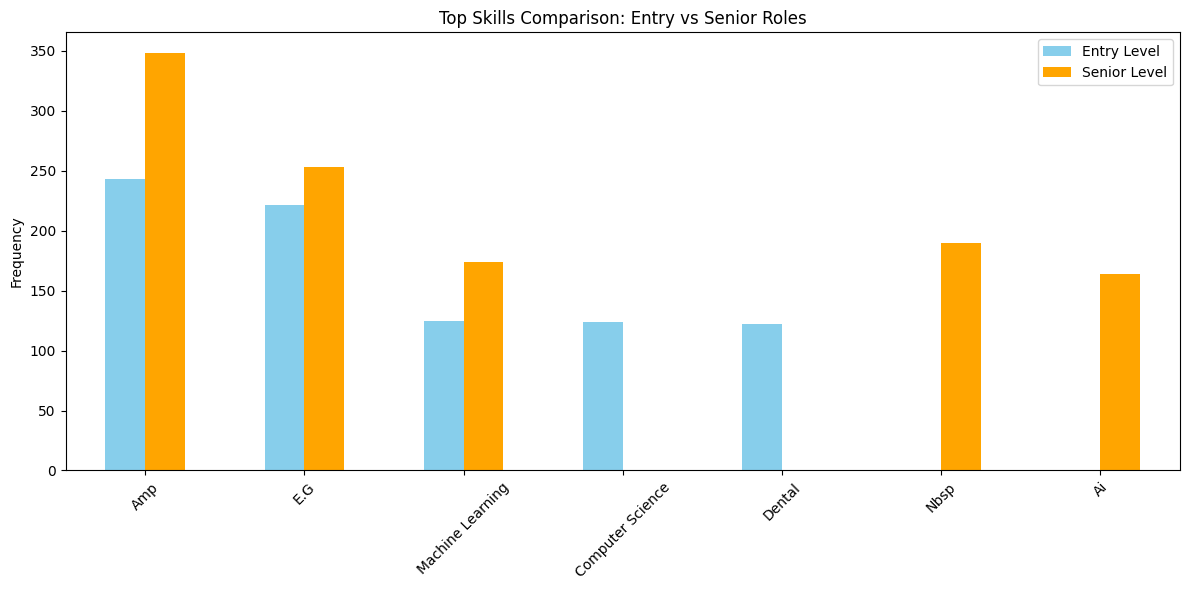

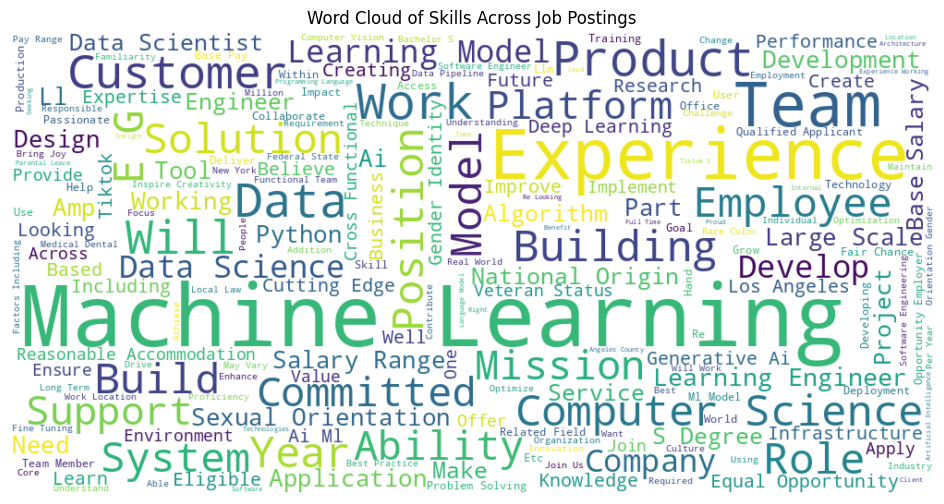


Interesting Pattern Observed:
The analysis reveals a noticeable trend: Entry-level roles commonly emphasize foundational programming and machine learning skills like Python and Machine Learning, while senior-level positions prioritize advanced competencies such as cloud computing, deployment tools, and system architecture—examples include AWS, Docker, and Kubernetes.


In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


file_path = 'dataset.csv'
df = pd.read_csv(file_path)


skill_pattern = r'\b[A-Za-z][A-Za-z0-9\+\#\.]*\b(?:\s[A-Za-z0-9\+\#\.]+){0,2}'

excluded_words = {
    'and', 'or', 'with', 'for', 'in', 'on', 'to', 'of', 'a', 'the', 'is', 'at', 'an', 'by',
    'as', 'are', 'from', 'our', 'we', 'you', 'job', 'work', 'team', 'experience',
    'skills', 'responsibilities', 'requirements', 'role', 'company', 'knowledge', 'ability'
}

normalization_map = {
    "Tensorflow": "TensorFlow",
    "Powerbi": "Power BI",
    "Cplusplus": "C++",
    "C plus plus": "C++",
    "Js": "JavaScript",
    "Javascript": "JavaScript",
    "Pytorch": "PyTorch",
    "Ml": "Machine Learning",
    "Dl": "Deep Learning",
}

def normalize_skill(skill):
    skill_cleaned = skill.strip().title()
    return normalization_map.get(skill_cleaned.replace(" ", ""), skill_cleaned)

def extract_skills(text):
    if pd.isna(text):
        return []
    matches = re.findall(skill_pattern, text)
    return [
        normalize_skill(word)
        for word in matches
        if len(word) > 1 and word.lower() not in excluded_words
    ]


df['skills'] = df['job_description_text'].apply(extract_skills)


entry_df = df[df['seniority_level'].str.contains('Entry', case=False, na=False)]
senior_df = df[df['seniority_level'].str.contains('Senior|Lead|Manager', case=False, na=False)]

entry_skill_counts = Counter(skill for skills in entry_df['skills'] for skill in skills)
senior_skill_counts = Counter(skill for skills in senior_df['skills'] for skill in skills)


total_skill_counts = Counter(skill for skills in df['skills'] for skill in skills)
top_50_skills = total_skill_counts.most_common(50)

print("Top 50 Most Common Skills:")
for skill, count in top_50_skills:
    print(f"{skill}: {count}")

print("\nTop 3 In-Demand Skills Overall:")
print(total_skill_counts.most_common(3))


entry_top5 = dict(entry_skill_counts.most_common(5))
senior_top5 = dict(senior_skill_counts.most_common(5))

skill_comparison_df = pd.DataFrame({
    'Entry Level': entry_top5,
    'Senior Level': senior_top5
}).fillna(0)

skill_comparison_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Top Skills Comparison: Entry vs Senior Roles")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

all_skills_text = " ".join(skill for skills in df['skills'] for skill in skills)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_skills_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Skills Across Job Postings")
plt.show()


print("\nInteresting Pattern Observed:")
print("The analysis reveals a noticeable trend: "
      "Entry-level roles commonly emphasize foundational programming and machine learning skills like Python and Machine Learning, "
      "while senior-level positions prioritize advanced competencies such as cloud computing, deployment tools, and system architecture—examples include AWS, Docker, and Kubernetes.")



Dataset loaded successfully!
Available columns: ['unnamed:_0', 'job_posted_date', 'company_address_locality', 'company_address_region', 'company_name', 'company_website', 'company_description', 'job_description_text', 'seniority_level', 'job_title']


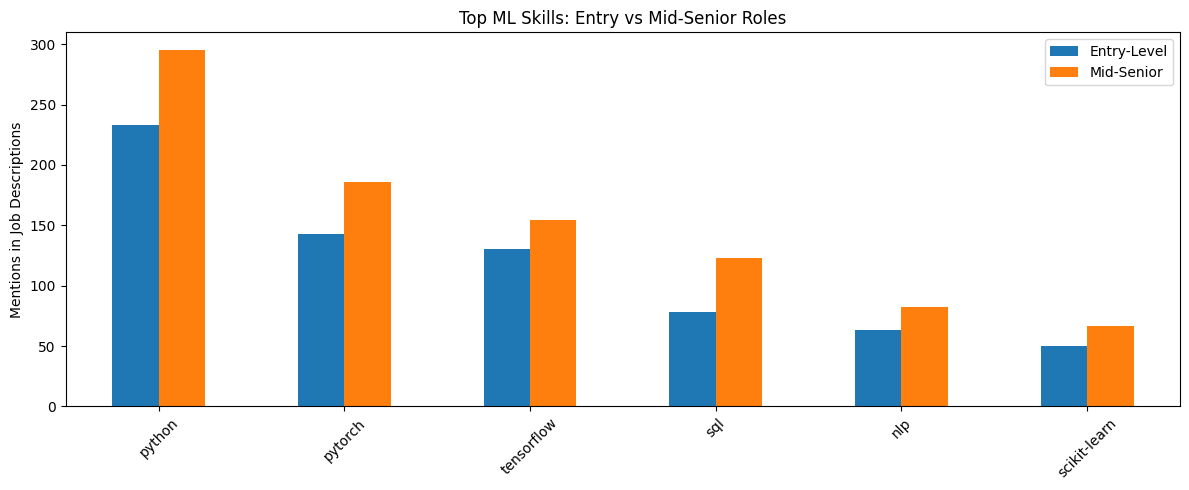

/tmp/ipython-input-2753042174.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette="magma")


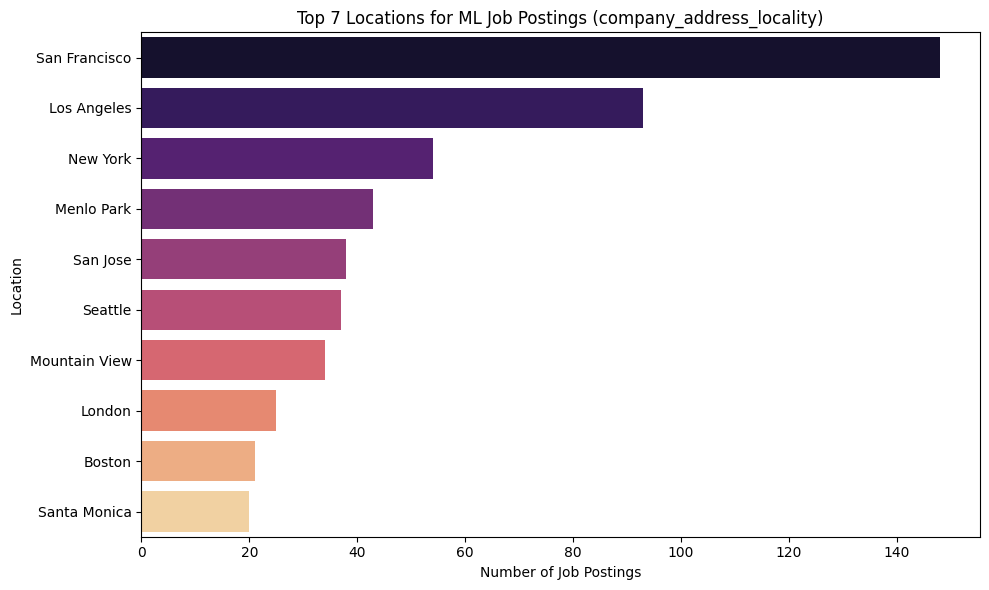

 salary column found, skipping salary visualization.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("dataset.csv")
print("Dataset loaded successfully!")
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

print("Available columns:", df.columns.tolist())


def extract_keywords_from_description(df, level_keywords):
    subset = df[df['seniority_level'].str.lower().str.contains(level_keywords, na=False)]
    text_series = subset['job_description_text'].dropna().str.lower()
    # Example skills to search for
    skills = ['python', 'tensorflow', 'pytorch', 'sql', 'scikit-learn', 'nlp']
    skill_counts = {skill: text_series.str.contains(skill).sum() for skill in skills}
    return pd.Series(skill_counts).sort_values(ascending=False)

entry_skills = extract_keywords_from_description(df, 'entry')
mid_skills = extract_keywords_from_description(df, 'mid')

skill_compare = pd.DataFrame({
    'Entry-Level': entry_skills,
    'Mid-Senior': mid_skills
}).fillna(0)

skill_compare.plot(kind='bar', figsize=(12, 5), title="Top ML Skills: Entry vs Mid-Senior Roles")
plt.ylabel("Mentions in Job Descriptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

location_col = 'company_address_locality'
location_counts = df[location_col].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="magma")
plt.title(f"Top 7 Locations for ML Job Postings ({location_col})")
plt.xlabel("Number of Job Postings")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

print(" salary column found, skipping salary visualization.")


In [ ]:
import pandas as pd
import re
import pickle
import nltk

nltk.download('stopwords')

df = pd.read_csv("dataset.csv")
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

if "job_description_text" not in df.columns:
    raise ValueError("Column 'job_description_text' not found in dataset")


predefined_skills = [
    "python", "java", "c++", "sql", "scala", "hadoop", "spark", "aws", "azure", "gcp",
    "tensorflow", "keras", "pytorch", "scikit-learn", "numpy", "pandas", "matplotlib",
    "nlp", "deep learning", "machine learning", "data analysis", "big data", "docker",
    "kubernetes", "fastapi", "flask", "rest api", "airflow", "git", "linux"
]

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

df['cleaned_desc'] = df['job_description_text'].fillna("").apply(clean_text)


def count_skills(text_series, skills):
    skill_freq = {skill: 0 for skill in skills}
    for text in text_series:
        for skill in skills:
            if skill in text:
                skill_freq[skill] += 1
    return pd.Series(skill_freq).sort_values(ascending=False)

skill_counts = count_skills(df['cleaned_desc'], predefined_skills)

def classify_skills(skill_series, threshold=0.25):
    max_freq = skill_series.max()
    limit = max_freq * threshold
    classification = {
        skill: ("common/established" if freq >= limit else "new/emerging")
        for skill, freq in skill_series.items()
    }
    return pd.Series(classification)

skill_classification = classify_skills(skill_counts)

result_df = pd.DataFrame({
    "Frequency": skill_counts,
    "Classification": skill_classification
}).sort_values(by="Frequency", ascending=False)

print(result_df.head(10))

model = {
    "skills": predefined_skills,
    "skill_frequencies": skill_counts.to_dict(),
    "classification": skill_classification.to_dict()
}

with open("skill_trend_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as skill_trend_model.pkl")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  Frequency      Classification
machine learning        848  common/established
python                  752  common/established
scala                   494  common/established
aws                     493  common/established
pytorch                 469  common/established
tensorflow              388  common/established
sql                     294  common/established
deep learning           290  common/established
git                     288  common/established
spark                   230  common/established
Model saved as skill_trend_model.pkl
